In [18]:
import gym
import numpy as np
import random
from gym.envs.registration import register
import matplotlib.pyplot as plt

env = gym.make("Taxi-v3")
#print(env.observation_space.n)
#print(env.action_space.n)

def rargmax(vector):
    m = np.max(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

Q = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 10000
num_test_episodes = 100

In [19]:
#학습하기
# 전체 리워드 포함한 리스트 만들기
rList = []
learning_rate = 0.85
dis = .99
for i in range(num_episodes): # 여러번 반복해서 학습
    observation = env.reset() # 환경을 리세하고, 첫번재 상태로 복귀
    rAll = 0
    done = False
    # Q-Table 학습시키기
    while not done:
        action = np.argmax(Q[observation,:] + np.random.randn(1,env.action_space.n)/ i + 1)                     
                                 
        #새로운 Observation 이랑 Reward
        new_observation, reward, done, info = env.step(action)
            
        Q[observation, action] = (1-learning_rate) * Q[observation, action] + learning_rate*(reward + dis * np.max(Q[new_observation, :]))
        
        rAll += reward
        observation = new_observation
    rList.append(rAll)

<ipython-input-19-10662ce010ad>:12: RuntimeWarning: divide by zero encountered in true_divide
  action = np.argmax(Q[observation,:] + np.random.randn(1,env.action_space.n)/ i + 1)


Success rate: 4.972
점수 : 6
[[ 0.          0.          0.          0.          0.          0.        ]
 [-6.53909483 -5.80040626 -5.78192327 -5.80040626  9.6220697  -8.5       ]
 [-4.77889112 -4.17836152 -4.81948209 -4.17836152 14.11880599 -8.5       ]
 ...
 [-2.52838641 -2.63763444 -2.52838641 -2.5444801  -8.5        -8.5       ]
 [-4.99284545 -4.98922541 -4.99284545 -4.38345569 -8.5        -8.5       ]
 [-0.85       -0.85        0.         18.62294749 -8.5        -8.5       ]]


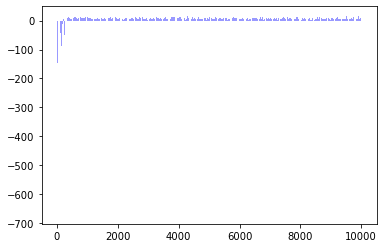

In [20]:
# 학습 데이터 확인
print("Success rate: " + str(sum(rList) / num_episodes))
print("점수 : " + str(rList[-1]))
print(Q)

plt.bar(range(len(rList)), rList, color="b", alpha=0.4)
plt.show()

In [21]:
#이게 맞나...

env.reset()
rList = []
for episode in range(num_test_episodes):
    observation = env.reset()
    rAll = 0
    done = False
    for i in range(10):
        action = np.argmax(Q[observation,:])
        new_observation, reward, done, info = env.step(action)
        rAll += reward
        
        if done:
            rList.append(rAll)
            break
        observation = new_observation
env.close()
print("Success rate: " + str(sum(rList) / num_test_episodes))
print("점수 : " + str(rList[-1]))

Success rate: 1.73
점수 : 13
